In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors


In [2]:
df = pd.read_csv('/home/ubuntu/FEAOF/data/raw/herg_raw_0528_clean.csv')

In [3]:
df.columns

Index(['Molecule ChEMBL ID', 'y', 'smiles'], dtype='object')

In [4]:
df["MW"]= df["smiles"].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df = df[df["MW"] < 1000]

Fig1_分子量分布图

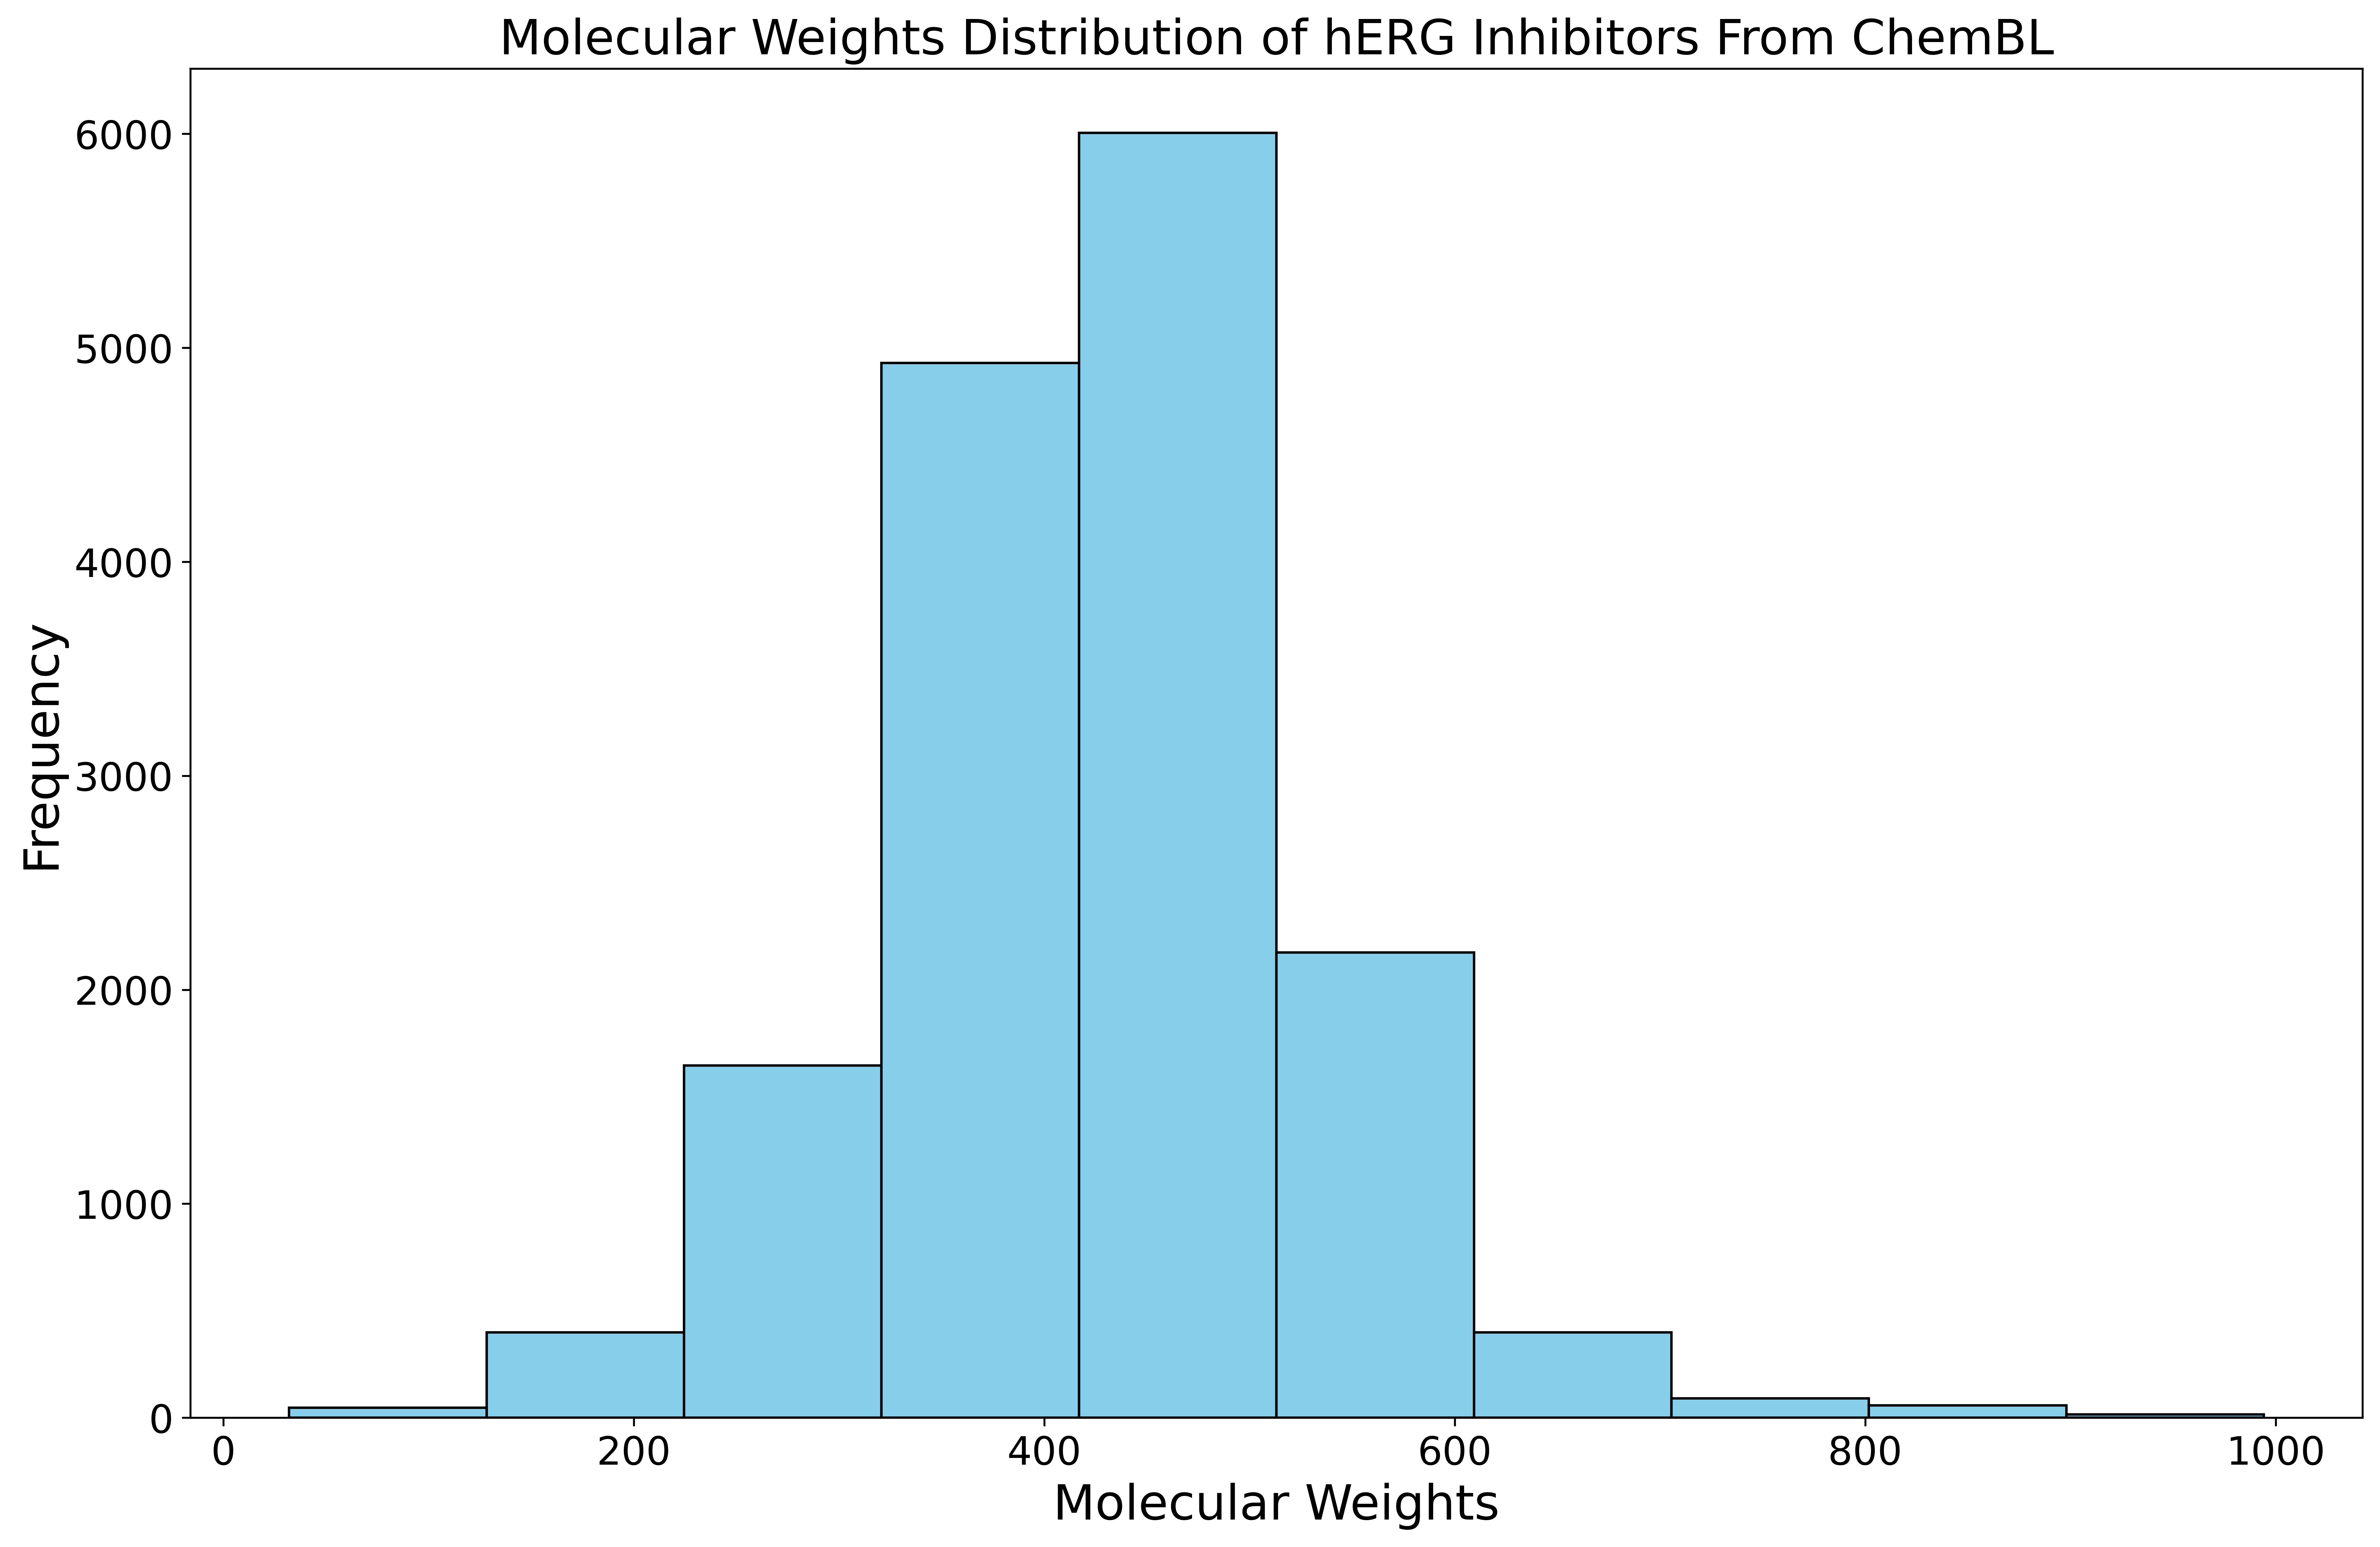

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi=600) # 12*8 24*8 8*8
plt.hist(df["MW"], bins=10, color='skyblue', edgecolor='black')

# 修改字体大小
plt.xlabel("Molecular Weights", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Molecular Weights Distribution of hERG Inhibitors From ChemBL", fontsize=20)

# 修改刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)

# 保存为矢量图（PDF格式）
plt.savefig("/home/ubuntu/FEAOF/figs/fig1_A.pdf", format='pdf', bbox_inches='tight')

plt.show()


Fig2_阴性和阳性数据对比

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset labels
datasets = ['Train', 'Validation', 'Test 1', 'Test 2']
negative = [5611, 670, 125, 275]
positive = [3814, 447, 52, 104]
x = np.arange(len(datasets))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 10), dpi=600)

# Colors
negative_color = '#FFD700'
positive_color = '#FF6347'

# Bars
rects1 = ax.bar(x - width/2, negative, width, label='Negative', color=negative_color)
rects2 = ax.bar(x + width/2, positive, width, label='Positive', color=positive_color)

# Labels & title
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Negative and Positive Counts by Datasets', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(datasets)  # Don't set fontsize here

# Set tick font size properly
ax.tick_params(axis='x', labelsize=20)  # This now works!
ax.tick_params(axis='y', labelsize=16)

ax.legend(fontsize=20)

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=16)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.savefig("/home/ubuntu/FEAOF/figs/fig1_B.pdf", format='pdf', bbox_inches='tight')
plt.show()
